In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot
import sklearn.datasets 

iris_dataset = sklearn.datasets.load_iris()

y = iris_dataset.target

# labels
print "Target classes", iris_dataset.target_names
print "Features names", iris_dataset.feature_names

# Actual data
print iris_dataset.data 
print iris_dataset.target

%matplotlib inline

Target classes ['setosa' 'versicolor' 'virginica']
Features names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]


In [99]:
from sklearn.neighbors import KNeighborsClassifier  # Our classifier
from sklearn.cross_validation import train_test_split  # Train-test 

X_iris = iris_dataset.data
y_iris = iris_dataset.target

# 2. Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=1)

# 3. Define our model
k = 5
knn_classif = KNeighborsClassifier(k)

# 4. Fit our model
knn_classif.fit(X_train, y_train)

# 5. Score
print "Train score: ", knn_classif.score(X_test, y_test)

len(X_test)

Train score:  0.977777777778


45

In [113]:
from sklearn.cross_validation import KFold

N_SAMPLES = 100
scores = []

kfolds = 5
iris_folds = KFold(len(X_iris), kfolds, shuffle=True)

# Subsetting:
def knn_classif(X_train, y_train, X_test, y_test, k = 5):
    # 3. Define our model
    knn_classif = KNeighborsClassifier(k)

    # 4. Fit our model
    knn_classif.fit(X_train, y_train)

    # 5. Score
    return knn_classif.score(X_test, y_test)
    
i = 1
for fold in iris_folds:
    #     print "TRAINING INDICES: ", fold[0]
    #     print "TEST INDICES: ", fold[1]
    
    X_train_fold = X_iris[fold[0], :]
    X_test_fold  = X_iris[fold[1], :]
        
    y_train_fold = y_iris[fold[0]]
    y_test_fold  = y_iris[fold[1]]

    print "fold: %s => %s" % (i, knn_classif(X_train_fold, y_train_fold, X_test_fold, y_test_fold))
    
    i += 1
    

fold: 1 => 0.933333333333
fold: 2 => 1.0
fold: 3 => 1.0
fold: 4 => 0.966666666667
fold: 5 => 0.933333333333


In [114]:
for k in range(2, N_SAMPLES):
    print "k: %s => %0.3f" % (k, knn_classif(k))
    
scores = [knn_classif(k) for k in range(2, N_SAMPLES)]

TypeError: knn_classif() takes at least 4 arguments (1 given)

98
98


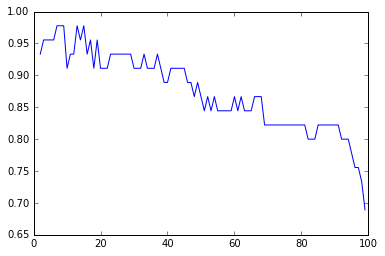

In [77]:
plt.plot(range(2, N_SAMPLES), scores)

print len(scores)
print len(range(2, N_SAMPLES))

In [129]:
from sklearn.grid_search import GridSearchCV

# Minimum three input for cross validation

# 1. Define the classifier
classifier = KNeighborsClassifier()

# 2. Define the parameter space
parameter_space = {
    'n_neighbors': range(2, 50),
    'weights': ['uniform', 'distance']
}

KNeighborsClassifier?

# 3. Define how to validate the model
cross_validator = KFold(len(X_iris), 20)

gridsearch = GridSearchCV(
    estimator=classifier, 
    param_grid=parameter_space, 
    cv=cross_validator
)

# Fit is a common function  in SKLearn
gridsearch.fit(X_iris, y_iris)

print "Best Params", gridsearch.best_params_
print "Best score", gridsearch.best_score_
for grid_score in gridsearch.grid_scores_:
    print grid_score

print "Best score was %0.3f at k=%s" % (gridsearch.best_score_, gridsearch.best_params_)

Best Params {'n_neighbors': 7, 'weights': 'distance'}
Best score 0.966666666667
mean: 0.94000, std: 0.08270, params: {'n_neighbors': 2, 'weights': 'uniform'}
mean: 0.96000, std: 0.06291, params: {'n_neighbors': 2, 'weights': 'distance'}
mean: 0.96000, std: 0.06291, params: {'n_neighbors': 3, 'weights': 'uniform'}
mean: 0.96000, std: 0.06291, params: {'n_neighbors': 3, 'weights': 'distance'}
mean: 0.94667, std: 0.08162, params: {'n_neighbors': 4, 'weights': 'uniform'}
mean: 0.96000, std: 0.06291, params: {'n_neighbors': 4, 'weights': 'distance'}
mean: 0.96000, std: 0.07317, params: {'n_neighbors': 5, 'weights': 'uniform'}
mean: 0.96000, std: 0.07317, params: {'n_neighbors': 5, 'weights': 'distance'}
mean: 0.94000, std: 0.09096, params: {'n_neighbors': 6, 'weights': 'uniform'}
mean: 0.95333, std: 0.07582, params: {'n_neighbors': 6, 'weights': 'distance'}
mean: 0.96000, std: 0.07317, params: {'n_neighbors': 7, 'weights': 'uniform'}
mean: 0.96667, std: 0.06968, params: {'n_neighbors': 7, '

## Question:
 - How to choose parameters of:
   - Model?
   - Train/Test split?
   - Model evaluation

### Train test split:
   - Keep ~70% of data
   - Test ~30% of data

# arr = np.array(range(1, 100))

from sklearn.cross_validation import KFold

kfolds = KFold(20, 4)

num = 1
for fold in kfolds:
    print "Fold: %s" % num
    
    print "Training indices", fold[0]
    print "Test indices", fold[1]
    print "\n"
    
    num += 1